# 1. Poner título a los datasets, eliminar duplicados y guardar en excel

In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from shutil import rmtree
from sklearn.model_selection import train_test_split

In [35]:
mainpath = "../datasets-tfg"
filename = "conferencias con nombres"
fullpath = os.path.join(mainpath, filename)

lista = os.listdir(fullpath) #Obtenemos la lista de todos los archivos de la carpeta "Conferencias con nombres"

In [36]:
#Vamos a crear la carpeta conferencias v1, donde vamos a guardar todas las conferencias prepreprocesadas, con sus respectivas gráficas
mainpath = "../datasets-tfg"
filename = "conferencias v1"
fullpath = os.path.join(mainpath, filename)

#Comprobamos si la carpeta ya existe
fileExists = os.path.isdir('../datasets-tfg/conferencias v1')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath) #creamos una carpeta, donde posteriormente almacenaremos los csv de las conferencias una vez procesados

In [37]:
#Creamos la carpeta entrenamiento
mainpath = "../datasets-tfg/conferencias v1"
fullpath = os.path.join(mainpath, "entrenamiento")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1"

#Creamos la carpeta test
fullpath = os.path.join(mainpath, "test")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

In [38]:
#Vamos a crear la carpeta csv, donde vamos a guardar todos los csv de las conferencias una vez preprocesadas
mainpath1 = "../datasets-tfg/conferencias v1/entrenamiento"
mainpath2 = "../datasets-tfg/conferencias v1/test"

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath1, "csv completo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/csv completo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath1, "csv cortado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/csv cortado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas, donde vamos a guardar todas las imagenes de las graficas de las conferencias una vez preprocesadas
fullpath = os.path.join(mainpath1, "graficas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/graficas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)


#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath2, "csv completo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/csv completo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath2, "csv cortado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/csv cortado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas, donde vamos a guardar todas las imagenes de las graficas de las conferencias una vez preprocesadas
fullpath = os.path.join(mainpath2, "graficas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/graficas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

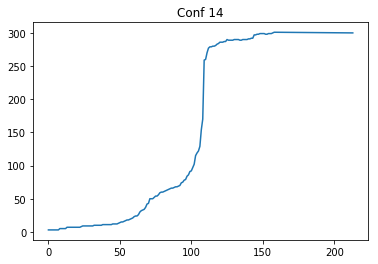

In [39]:
filepath = "../datasets-tfg/conferencias con nombres/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/csv completo/"
filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/csv cortado/"
filepath3 = "../datasets-tfg/conferencias v1/entrenamiento/graficas/"
filepath4 = "../datasets-tfg/conferencias v1/test/csv completo/"
filepath5 = "../datasets-tfg/conferencias v1/test/csv cortado/"
filepath6 = "../datasets-tfg/conferencias v1/test/graficas/"

#Estos son los títulos que queremos para cada columna
conf1_cols=["Fecha", "Enviados", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "Aceptados", "Porcentaje aceptados","Rechazados",
            "Borrados","Registrados","Sin version final","Desconocido"]

#Obtenemos la lista de todos los archivos de la carpeta "conferencias con nombres"
lista1 = os.listdir("../datasets-tfg/conferencias con nombres")


#Dividimos los datasets en entrenamiento y testeo usando la regla de pareto
data_train, data_test = train_test_split(lista1, test_size=0.2)

for i in range (0,len(data_train)):
    filename = str(data_train[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file, header=None, names=conf1_cols)
    temp_data = temp_data.drop_duplicates()
    temp_data = temp_data.dropna()
    temp_data = temp_data.reset_index(drop=True)
    temp_data.to_csv(filepath1 + 'Conf' + str(i) + '.csv', index=False)
    tail = temp_data[temp_data["Enviados"]>=int(temp_data.tail(1)["Enviados"])].index
    tail = np.delete(tail, 0)
    temp_data = temp_data.drop(tail)
    temp_data.to_csv(filepath2 + 'Conf' + str(i) + '.csv', index=False)
    
    %matplotlib inline
    plt.plot(temp_data["Enviados"])
    plt.title("Conf " + str(i)) 
    
    plt.savefig(filepath3 + "Grafica Conf " + str(i) + " (" + str(data_train[i]) +  ").jpg")
    
    ult_fila = temp_data.tail(1)
    
    
    if i == 0:
        data = ult_fila
    else:
        data = pd.concat([data, ult_fila], axis=0, sort=False)
    
for i in range (0,len(data_test)):
    filename = str(data_test[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file, header=None, names=conf1_cols)
    temp_data = temp_data.drop_duplicates()
    temp_data = temp_data.dropna()
    temp_data = temp_data.reset_index(drop=True)
    temp_data.to_csv(filepath4 + 'Conf' + str(i) + '.csv', index=False)
    tail = temp_data[temp_data["Enviados"]>=int(temp_data.tail(1)["Enviados"])].index
    tail = np.delete(tail, 0)
    temp_data = temp_data.drop(tail)
    temp_data.to_csv(filepath5 + 'Conf' + str(i) + '.csv', index=False)
    
    %matplotlib inline
    plt.plot(temp_data["Enviados"])
    plt.title("Conf " + str(i)) 
    
    plt.savefig(filepath6 + "Grafica Conf " + str(i) + " (" + str(data_train[i]) +  ").jpg")
    
    ult_fila = temp_data.tail(1)
    
    
    if i == 0:
        data = ult_fila
    else:
        data = pd.concat([data, ult_fila], axis=0, sort=False)
    
    

# 2. Recorte automático de curvas por escalones y guardado en fichero

In [40]:
####ENTRENAMIENTO####
#Creamos la carpeta Curvas
mainpath = "../datasets-tfg/conferencias v1/entrenamiento"
fullpath = os.path.join(mainpath, "curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta picos para division 
fullpath = os.path.join(mainpath, "picos para division")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/picos para division')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta conf dividida 
fullpath = os.path.join(mainpath, "conf dividida")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/conf dividida')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
####TEST####
#Creamos la carpeta Curvas
mainpath = "../datasets-tfg/conferencias v1/test"
fullpath = os.path.join(mainpath, "curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1/test/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta picos para division 
fullpath = os.path.join(mainpath, "picos para division")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/picos para division')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta conf dividida 
fullpath = os.path.join(mainpath, "conf dividida")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/conf dividida')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

In [41]:
from scipy.signal import find_peaks

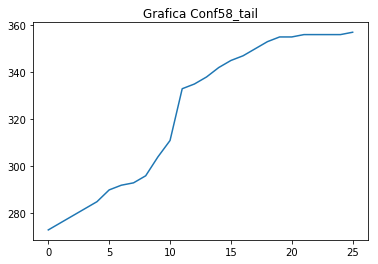

In [42]:
####Curvas entrenamiento#####

filepath = "../datasets-tfg/conferencias v1/entrenamiento/csv completo/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas/"
filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas/"
filepath3= "../datasets-tfg/conferencias v1/entrenamiento/curvas/picos para division/"
filepath4= "../datasets-tfg/conferencias v1/entrenamiento/curvas/conf dividida/"
filepath5= "../datasets-tfg/conferencias v1/entrenamiento/curvas/"

#declaramos un dataframe vacio
mapa = pd.DataFrame(columns=('NombreCurva', 'Escalon', 'DiasTotales', 'EnviadosTotales'))

lista1 = os.listdir("../datasets-tfg/conferencias v1/entrenamiento/csv completo")

b = len(lista1)
for i in range (0, b): #En el in range no entra el último
#for i in range (36, 37):   
    
    filename = "Conf" + str(i) + ".csv"
    file = filepath + filename
    
    #Df completo
    df = pd.read_csv(file)  
    #df = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/csv cortado/" + filename)
    env_lista = df["Enviados"].tolist()    
    env_vect = np.asarray(env_lista)
    m = len(env_vect)
    
    #Df cortado
    df1 = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/csv cortado/" + filename)
    env_lista1 = df1["Enviados"].tolist()    
    env_vect1 = np.asarray(env_lista1)
    h = len(env_vect1)
    
    #Calculamos la derivada en cada punto del df completo
    deriv = env_vect[1]-env_vect[0]   
    deriv = [deriv]
    
    for j in range (2, m):
        d = env_vect[j]-env_vect[j-1]
        deriv.append(d)
    
    #Pasamos la derivada a de formato lista a vector    
    deriv1 = np.asarray(deriv)    
    
   
    #Hacemos lo mismo para el df cortado 
    #Calculamos la derivada en cada punto del df cortado
    deriv_cortada = env_vect1[1]-env_vect1[0]   
    deriv_cortada = [deriv_cortada]
    
    for j in range (2, h):
        d = env_vect1[j]-env_vect1[j-1]
        deriv_cortada.append(d)

    #Pasamos la derivada a de formato lista a vector    
    deriv1_cortada = np.asarray(deriv_cortada)    
         
    p = np.amax(deriv1) / 6
    
    #Busco los máximos de la derivada
    n = len(deriv1)
    x = np.array(range(0,n,1))
    peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
    
    if (len(peaks)==0 or np.all(peaks==0)):
        p = 2.5
        peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
    
    if df["Enviados"][peaks[len(peaks)-1]]>=0.9*df["Enviados"][len(df)-1]:
        peaks = np.delete(peaks, len(peaks)-1)
        
    #for k in range (1,2):
    for k in range (0, len(peaks)):
        if k==(len(peaks)-1) and (peaks[k]+2)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]])]
        elif k==(len(peaks)-1) and (peaks[k]+3)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1])]
        elif k==(len(peaks)-1) and (peaks[k]+4)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2])]
        elif k==(len(peaks)-1) and (peaks[k]+5)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3])]
        elif k==(len(peaks)-1) and (peaks[k]+6)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4])]
        else:
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4]), abs(deriv1[peaks[k]+6]-deriv1[peaks[k]+5])]
        
        for a in range (0, len(deriv2)):
            if deriv2[a]>(max(deriv2)/3):
                peaks[k] = peaks[k]+a
                
        #if len(deriv2)>1:
         #   if max(deriv2)==deriv2[1]:
           #     peaks[k] = peaks[k]+1
           # elif len(deriv2)>2 and max(deriv2)==deriv2[2]:
           #     peaks[k] = peaks[k]+2
           # elif len(deriv2)>3 and max(deriv2)==deriv2[3]:
           #     peaks[k] = peaks[k]+3
           # elif len(deriv2)>4 and max(deriv2)==deriv2[4]:
           #     peaks[k] = peaks[k]+4   
           # elif len(deriv2)>5 and max(deriv2)==deriv2[5]:
           #     peaks[k] = peaks[k]+5
            
    %matplotlib inline
    r = len(deriv1_cortada)
    x_cortada = np.array(range(0,r,1))
    plt.plot(x_cortada, deriv1_cortada)
    plt.plot(peaks, deriv1[peaks], "x")
    plt.title('Grafica Conf' + str(i)) 
    plt.savefig(filepath3 + "Conf " + str(i) + '_peaks' + ".jpg")
    
    %matplotlib inline
    plt.plot(env_vect1)
    plt.plot(peaks+1, env_vect[peaks+1], "x")
    plt.title("Conf " + str(i)) 
    plt.savefig(filepath4 + "Conf " + str(i) + '_division' + ".jpg")
    
    #Dividimos la curva en escalones
    if len(peaks) <= 5:
        n = len(peaks)
    else:
        n = 5
    
    error = 1
    
    #for l in range (2,3):
    for l in range (0,n):
        if n==1:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                if(len(tail)!=0):
                    tail = np.delete(tail, 0)
                    tail = np.delete(tail, 0)
                    curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        elif l==0:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
        
        elif l==n-1:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                if(len(tail)!=0):
                    tail = np.delete(tail, 0)
                    tail = np.delete(tail, 0)
                    curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        else:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
mapa.to_csv(filepath5 + 'Mapa.csv', index=False)

In [43]:
peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=9)
peaks

array([103, 114], dtype=int64)

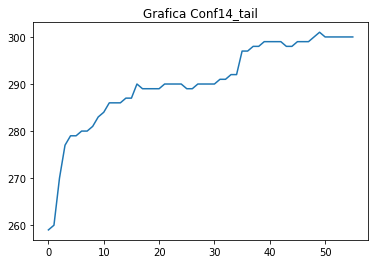

In [44]:
####Curvas test#####

filepath = "../datasets-tfg/conferencias v1/test/csv completo/"
filepath1 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas/"
filepath2 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas/"
filepath3= "../datasets-tfg/conferencias v1/test/curvas/picos para division/"
filepath4= "../datasets-tfg/conferencias v1/test/curvas/conf dividida/"
filepath5= "../datasets-tfg/conferencias v1/test/curvas/"


#declaramos un dataframe vacio
mapa = pd.DataFrame(columns=('NombreCurva', 'Escalon', 'DiasTotales', 'EnviadosTotales'))
mapa2 = pd.DataFrame(columns=('Nombre conferencia', 'Numero escalones', 'Numero Enviados'))

lista1 = os.listdir("../datasets-tfg/conferencias v1/test/csv completo")

b = len(lista1)
for i in range (0, b): #En el in range no entra el último
    
    filename = "Conf" + str(i) + ".csv"
    file = filepath + filename
    
    #Df completo
    df = pd.read_csv(file)             
    env_lista = df["Enviados"].tolist()    
    env_vect = np.asarray(env_lista)
    m = len(env_vect)
    
    #Df cortado
    df1 = pd.read_csv("../datasets-tfg/conferencias v1/test/csv cortado/" + filename)
    env_lista1 = df1["Enviados"].tolist()    
    env_vect1 = np.asarray(env_lista1)
    h = len(env_vect1)
    
    #Calculamos la derivada en cada punto del df completo
    deriv = env_vect[1]-env_vect[0]   
    deriv = [deriv]
    
    for j in range (2, m):
        d = env_vect[j]-env_vect[j-1]
        deriv.append(d)
    
    #Pasamos la derivada a de formato lista a vector    
    deriv1 = np.asarray(deriv)    
    
    #Hacemos lo mismo para el df cortado 
    #Calculamos la derivada en cada punto del df cortado
    deriv_cortada = env_vect1[1]-env_vect1[0]   
    deriv_cortada = [deriv_cortada]
    
    for j in range (2, h):
        d = env_vect1[j]-env_vect1[j-1]
        deriv_cortada.append(d)

    #Pasamos la derivada a de formato lista a vector    
    deriv1_cortada = np.asarray(deriv_cortada)    

        
    p = np.amax(deriv1) / 6
    
    #Busco los máximos de la derivada
    n = len(deriv1)
    x = np.array(range(0,n,1))
    peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
    
    if (len(peaks)==0 or np.all(peaks==0)):
        p = 2.5
        peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
        
    if df["Enviados"][peaks[len(peaks)-1]]>=0.9*df["Enviados"][len(df)-1]:
        peaks = np.delete(peaks, len(peaks)-1)
    
    #for k in range (1,2):
    for k in range (0, len(peaks)):
        if k==(len(peaks)-1) and (peaks[k]+2)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]])]
        elif k==(len(peaks)-1) and (peaks[k]+3)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1])]
        elif k==(len(peaks)-1) and (peaks[k]+4)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2])]
        elif k==(len(peaks)-1) and (peaks[k]+5)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3])]
        elif k==(len(peaks)-1) and (peaks[k]+6)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4])]
        else:
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4]), abs(deriv1[peaks[k]+6]-deriv1[peaks[k]+5])]
        
        for a in range (0, len(deriv2)):
            if deriv2[a]>(max(deriv2)/3):
                peaks[k] = peaks[k]+a
                
    
    %matplotlib inline
    r = len(deriv1_cortada)
    x_cortada = np.array(range(0,r,1))
    plt.plot(x_cortada, deriv1_cortada)
    plt.plot(peaks, deriv1[peaks], "x")
    plt.title('Grafica Conf' + str(i)) 
    plt.savefig(filepath3 + "Conf " + str(i) + '_peaks' + ".jpg")
    
    
    %matplotlib inline
    plt.plot(env_vect1)
    plt.plot(peaks+1, env_vect[peaks+1], "x")
    plt.title("Conf " + str(i)) 
    plt.savefig(filepath4 + "Conf " + str(i) + '_division' + ".jpg")
    
    #Dividimos la curva en escalones
    if len(peaks)<=5:
        n = len(peaks)
    else:
        n = 5

    error = 1

    for l in range (0,n):
        if n==1:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                tail = np.delete(tail, 0)
                tail = np.delete(tail, 0)
                curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        elif l==0:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
        
        elif l==n-1:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                tail = np.delete(tail, 0)
                tail = np.delete(tail, 0)
                curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        else:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
    mapa2.loc[len(mapa2)] = ['Conf' + str(i), n+1, df["Enviados"][len(df)-1]]
            
mapa.to_csv(filepath5 + 'Mapa.csv', index=False)
mapa2.to_csv(filepath5 + 'Mapa conferencias.csv', index=False)

# 3. Escalado de las curvas

In [45]:
### Curvas entrenamiento ###

mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)


### Curvas test ###

mainpath = "../datasets-tfg/conferencias v1/test/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas (eje x)")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas (eje x)")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas (eje x)')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

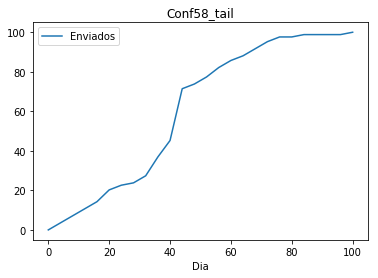

In [46]:
### Curvas entrenamiento ####

filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"


mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")   
n = len(mapa_curv) #número de archivos en la carpeta

for i in range (0, n): #En el in range no entra el último
    filename = str(mapa_curv["NombreCurva"][i]) + ".csv"
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    
    if mapa_curv["Escalon"][i]==1:
        drop = temp_data[temp_data["Enviados"]<=int(temp_data["Enviados"][len(temp_data)-1]*0.05)].index
        temp_data = temp_data.drop(drop)
        temp_data = temp_data.reset_index(drop=True)   
        
    size = temp_data.shape
    rows = size[0]
    
    Enviados = temp_data["Enviados"]
    Dia = list(range(0, rows))
    
    FactorX = 100/(rows-1)
    Offset = 0-temp_data["Enviados"][0]
    if (temp_data["Enviados"][rows-1]+Offset != 0):
        FactorY = 100/(temp_data["Enviados"][rows-1]+Offset)
    else:
        FactorY = 100
    
    EnviadosEsc = (Enviados+Offset)*FactorY
    if np.all(EnviadosEsc==0):
        EnviadosEsc = EnviadosEsc + 100
    Diav = np.asarray(Dia)
    DiaEsc = Diav*FactorX
    
    data = pd.DataFrame(columns=('Dia', 'Enviados'))
    for j in range (0, rows):
        data.loc[len(data)]=[DiaEsc[j], EnviadosEsc[j]] 
    
    
    data.to_csv(filepath1 + str(mapa_curv["NombreCurva"][i])  + ".csv", index=False)
    
    %matplotlib inline
    data.plot(x="Dia", y="Enviados")
    plt.title(str(mapa_curv["NombreCurva"][i])) 
    
    filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/"
    plt.savefig(filepath2 + str(mapa_curv["NombreCurva"][i]) + ".jpg")


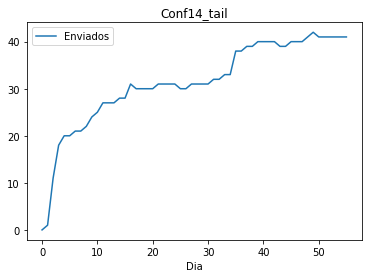

In [47]:
### Curvas test ####

filepath = "../datasets-tfg/conferencias v1/test/curvas/csv curvas/"
filepath1 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/"
filepath2 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/"
filepath3 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas/"
filepath4 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas (eje x)/"

mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")   
n = len(mapa_curv) #número de archivos en la carpeta

for i in range (0, n): #En el in range no entra el último
    filename = str(mapa_curv["NombreCurva"][i]) + ".csv"
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    
    if mapa_curv["Escalon"][i]==1:
        drop = temp_data[temp_data["Enviados"]<=int(temp_data["Enviados"][len(temp_data)-1]*0.05)].index
        temp_data = temp_data.drop(drop)
        temp_data = temp_data.reset_index(drop=True) 
    
    size = temp_data.shape
    rows = size[0]
    
    Enviados = temp_data["Enviados"]
    Dia = list(range(0, rows))
    
    FactorX = 100/(rows-1)
    Offset = 0-temp_data["Enviados"][0]
    if (temp_data["Enviados"][rows-1]+Offset != 0):
        FactorY = 100/(temp_data["Enviados"][rows-1]+Offset)
    else:
        FactorY = 100
    
    EnviadosOffset = Enviados+Offset
    EnviadosEsc = (Enviados+Offset)*FactorY
    if np.all(EnviadosEsc==0):
        EnviadosEsc = EnviadosEsc + 100
    Diav = np.asarray(Dia)
    DiaEsc = Diav*FactorX
    
    data = pd.DataFrame(columns=('Dia', 'Enviados'))
    data1 = pd.DataFrame(columns=('Dia', 'Enviados'))
    for j in range (0, rows):
        data.loc[len(data)]=[DiaEsc[j], EnviadosEsc[j]] 
        data1.loc[len(data1)]=[Dia[j], EnviadosOffset[j]] 
    data.to_csv(filepath1 + str(mapa_curv["NombreCurva"][i])  + ".csv", index=False)
    data1.to_csv(filepath2 + str(mapa_curv["NombreCurva"][i])  + ".csv", index=False)
    
    %matplotlib inline
    data.plot(x="Dia", y="Enviados")
    plt.title(str(mapa_curv["NombreCurva"][i])) 
    plt.savefig(filepath3 + str(mapa_curv["NombreCurva"][i]) + ".jpg")
    
    %matplotlib inline
    data1.plot(x="Dia", y="Enviados")
    plt.title(str(mapa_curv["NombreCurva"][i])) 
    plt.savefig(filepath4 + str(mapa_curv["NombreCurva"][i]) + ".jpg")


# 4. Clustering

In [48]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
import shutil

In [49]:
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")

dataframe = pd.DataFrame(columns=('NombreCurva','0','1','2','3','4','5','6','7','8','9','10'))

for i in range (0, len(mapa_conf)):
    if mapa_conf["Escalon"][i]!=-1:
        filename = str(mapa_conf["NombreCurva"][i]) + ".csv"
        file = os.path.join(filepath, filename)
        
        curva_esc = pd.read_csv(file)
        
        index=len(curva_esc)/10
        dataframe.loc[len(dataframe)]=[mapa_conf["NombreCurva"][i], curva_esc["Enviados"][0], curva_esc["Enviados"][round(index)], curva_esc["Enviados"][round(index*2)], curva_esc["Enviados"][round(index*3)], curva_esc["Enviados"][round(index*4)], curva_esc["Enviados"][round(index*5)], curva_esc["Enviados"][round(index*6)], curva_esc["Enviados"][round(index*7)], curva_esc["Enviados"][round(index*8)], curva_esc["Enviados"][round(index*9)], curva_esc["Enviados"][round(index*10-1)]]  

dataframe

,NombreCurva,0,1,2,3,4,5,6,7,8,9,10
0,Conf0_C1,0.0,3.571429,3.571429,3.571429,3.571429,3.571429,10.714286,25.000000,35.714286,100.000000,100.0
1,Conf0_C2,0.0,12.195122,12.195122,14.634146,14.634146,19.512195,24.390244,26.829268,34.146341,53.658537,100.0
2,Conf0_C3,0.0,4.794521,13.698630,15.068493,15.753425,18.493151,26.027397,33.561644,39.726027,44.520548,100.0
3,Conf1_C1,0.0,6.250000,6.250000,6.250000,12.500000,25.000000,34.375000,50.000000,50.000000,100.000000,100.0
4,Conf1_C2,0.0,0.000000,0.000000,0.000000,1.960784,5.882353,11.764706,15.686275,29.411765,39.215686,100.0
5,Conf2_C1,0.0,0.854701,0.854701,0.854701,0.854701,3.418803,5.982906,17.948718,32.478632,42.735043,100.0
6,Conf3_C1,0.0,0.000000,3.571429,7.142857,14.285714,25.000000,25.000000,35.714286,39.285714,53.571429,100.0
7,Conf3_C2,0.0,1.398601,4.895105,9.090909,12.587413,16.783217,27.272727,34.265734,45.454545,55.944056,100.0
8,Conf3_C3,0.0,3.809524,4.761905,8.571429,12.380952,13.333333,19.047619,31.428571,86.666667,100.000000,100.0
9,Conf4_C1,0.0,0.000000,0.877193,1.754386,1.754386,1.754386,4.385965,13.157895,17.543860,35.087719,100.0


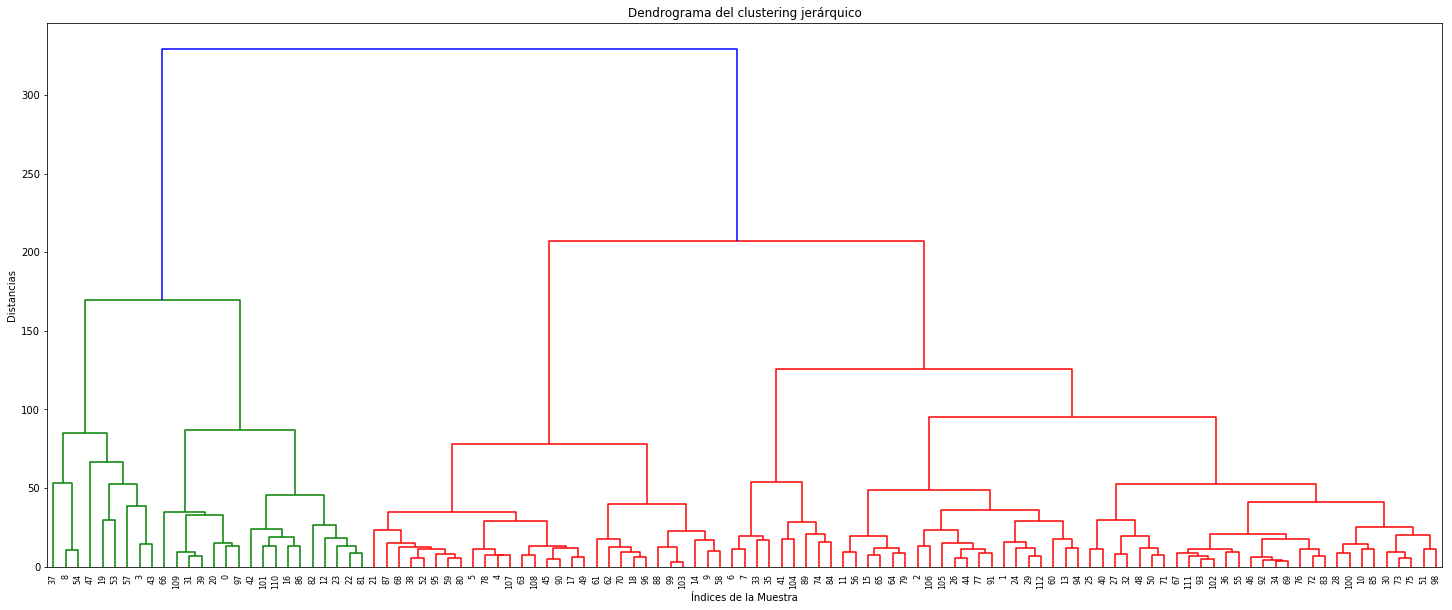

In [50]:
df = dataframe.drop(columns=['NombreCurva'])
Z = linkage(df, "ward")
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

[329.30580141 207.03593163 169.91760883 125.60836171  95.19125984
  87.22143299  85.28470106  78.30454695  66.75102833  53.55040198]


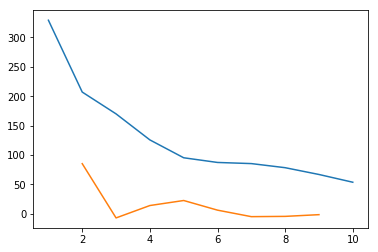

El número óptimo de cluster es 2


In [53]:
#método del codo
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [54]:
#Recuperamos los clusters y sus elementos
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2], dtype=int32)

In [70]:
mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"
mainpath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering"

#Creamos la carpeta graficas clustering
fullpath = os.path.join(mainpath, "clustering")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

for j in range (0, k+1):
    if j==0:
        
        fullpath = os.path.join(mainpath1, "csv tail")
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv tail')
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath1, "graficas tail")
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas tail')
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
    else:
        
        fullpath = os.path.join(mainpath1, "csv cluster " + str(j))
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv cluster ' + str(j))
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath1, "graficas cluster " + str(j))
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas cluster ' + str(j))
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
for i in range(0, len(mapa_conf)):
    if mapa_conf["Escalon"][i]==-1:
        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.csv'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.csv', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv tail')
        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.jpg'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.jpg', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas tail')
   
    else: 

        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.csv'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.csv', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv cluster ' + str(clusters[dataframe[dataframe["NombreCurva"]==mapa_conf["NombreCurva"][i]].index][0]))
        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.jpg'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.jpg', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas cluster ' + str(clusters[dataframe[dataframe["NombreCurva"]==mapa_conf["NombreCurva"][i]].index][0]))
       
            
    

In [67]:
os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf["NombreCurva"][i] + '.jpg')          

True

# 5. Modelización de las curvas

In [212]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)


In [213]:
mainpath = "../datasets-tfg/conferencias v1"
mainpath1 = "../datasets-tfg/conferencias v1/resultado"

#Creamos la carpeta graficas resultado
fullpath = os.path.join(mainpath, "resultado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas modelos curvas
fullpath = os.path.join(mainpath1, "graficas modelos")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas modelos')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,83.0,107.0,24.0,0.224299
1,0,1,2/5,79.0,107.0,28.0,0.261682
2,0,1,3/5,73.0,107.0,34.0,0.317757
3,0,1,4/5,70.0,107.0,37.0,0.345794
4,0,2,1/5,17.0,32.0,15.0,0.468750
5,0,2,2/5,11.0,32.0,21.0,0.656250
6,0,2,3/5,14.0,32.0,18.0,0.562500
7,0,2,4/5,15.0,32.0,17.0,0.531250
8,0,-1,1/5,2.0,2.0,0.0,0.000000
9,0,-1,2/5,2.0,2.0,0.0,0.000000


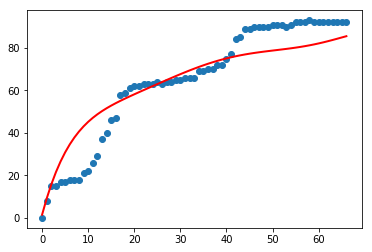

In [214]:
def entrenar_modelo(grado, x, x_test, y, y_test):
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree = grado)
            
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
            
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
            
    #Entreno el modelo
    pr.fit(x_train_poli, y)
            
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
            
    R2 = pr.score(x_test_poli, y_test)
    #mse = mean_squared_error(y_true = y_test, y_pred = y_pred_pr)
    return y_pred_pr, R2

from statistics import *
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/"
mainpath = "../datasets-tfg/conferencias v1/resultado"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")
mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")
#result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'Mse','Rmse','R2'))
result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'ErrorRel'))

d = len(mapa_conf)
for j in range (0, d):

    for k in range (1, mapa_conf["Numero escalones"][j] + 1):
        
        if k!=mapa_conf["Numero escalones"][j]:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_C" + str(k) + ".csv")
        else:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_tail.csv")
       
        ndias=len(prueba)
        
        #Estos datos los usaremos para comprobar el modelo elegido
        x_test1= np.arange(0,ndias,1)
        x_test1 = x_test1[:, np.newaxis]
        y_test1 = prueba["Enviados"]
            
        mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")
        n=len(mapa)
                      
        #mse=[]
        #rmse=[]
        #coefR2=[]  
        i=0
        x=0
        y=0
        flag=0
        R2_aux=0
        while i<n:
            
            if k!=mapa_conf["Numero escalones"][j]:
                if mapa["Escalon"][i]==k:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.reset_index(drop=True)
                    
            
            #   if ["Escalon"][i]==k:
            #       if i==0:
            #           y = temp_data["Enviados"]
            #           x = temp_data["Dia"]
            #       else: 
            #           y = np.append(y,temp_data["Enviados"])
            #           x = np.append(x,temp_data["Dia"])
            
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
                        
            else:
                
                if mapa["Escalon"][i]==-1:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.replace([np.inf, -np.inf], np.nan).dropna()
                    temp_data = temp_data.reset_index(drop=True)
                    
            
            #   if ["Escalon"][i]==k:
            #       if i==0:
            #           y = temp_data["Enviados"]
            #           x = temp_data["Dia"]
            #       else: 
            #           y = np.append(y,temp_data["Enviados"])
            #           x = np.append(x,temp_data["Dia"])
            
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
            
            i=i+1
        
        x=x/100*ndias
        x = x[:, np.newaxis]
        grado=6
        
        for l in range (1, 5):
            
            #Estos datos los usaremos para elegir el modelo que mejor se ajuste
            x_test= np.arange(0,round(l*ndias/5),1)
            drop= np.arange(round(l*ndias/5),ndias,1)
            prueba1 = prueba.drop(drop)
            if np.all(x_test==0):
                x_test = np.arange(0, 1, 1)
                drop= np.arange(1,ndias,1)
                prueba1 = prueba.drop(drop)
            x_test = x_test[:, np.newaxis]
            y_test = prueba1["Enviados"]
            
            matrizR2 = np.zeros(shape=(n,6))
            R2=[]
        
            h=0
            while h<1200:
                y1=y/100*h
                m=len(y)
                
                y_pred_pr, R2_aux = entrenar_modelo(grado, x, x_test, y1, y_test)
                R2.append(R2_aux)
                
                h=h+1
        
            R2p=0
            escala=0
            for a in range (0, len(R2)):
                if R2[a]>R2p:
                    R2p=R2[a]
                    escala=a+0
        
            if escala==0:
                R2p=abs(R2[0])
                escala=0
                for a in range (0, len(R2)):
                    if abs(R2[a])<R2p:
                        R2p=abs(R2[a])
                        escala=a+0
                
        #x_test=np.arange(0,ndias,1)
        #x_test = x_test[:, np.newaxis]
        
            y1=y/100*escala
        
            #Se define el grado del polinomio
            poli_reg = PolynomialFeatures(degree =grado)
        
            #Se transforma las características existentes en características de mayor grado
            x_train_poli = poli_reg.fit_transform(x)
            x_test_poli = poli_reg.fit_transform(x_test1)
        
            #Defino el algoritmo a utilizar
            pr = LinearRegression()
        
            #Entreno el modelo
            pr.fit(x_train_poli, y1)
        
            #Realizo una predicción
            y_pred_pr = pr.predict(x_test_poli)
        
            #c0 = pr.intercept_
            #c1 = pr.coef_[1]
        
            #if grado>1:
                #c2 = pr.coef_[2]
                #if grado>2:
                    #c3 = pr.coef_[3]
                    #if grado>3:
                        #c4 = pr.coef_[4]
                        #if grado>4:
                            #c5 = pr.coef_[5]
                            #if grado>5:
                                #c6 = pr.coef_[6]
                                
            # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
            #mse.append(mean_squared_error(y_true = y_test1, y_pred = y_pred_pr))         

            # La raíz cuadrada del MSE es el RMSE
            #rmse.append(np.sqrt(mse[l-1]))
                      
            #coefR2.append(pr.score(x_test_poli, y_test1))   
            if k!=mapa_conf["Numero escalones"][j]:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_C" + str(k)]
            else:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_tail"]
            
            mapa_curv1 = mapa_curv1.reset_index(drop=True)
            #result.loc[len(result)]=[str(j), str(k), str(l), escala, mapa_curv1["EnviadosTotales"][0], escala-mapa_curv1["EnviadosTotales"][0], mse[l-1], rmse[l-1], coefR2[l-1]]   
            if k!=mapa_conf["Numero escalones"][j]:
                result.loc[len(result)]=[str(j), str(k), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
            else:
                result.loc[len(result)]=[str(j), str(-1), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
           
            %matplotlib inline
            plt.scatter(x_test1, y_test1)
            plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
            
            if k!=mapa_conf["Numero escalones"][j]:
                plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(escala)  )
            else:
                plt.savefig(filepath3 + "Conf " + str(j) + " Tail " + str(l) + "%5" + " Escala " + str(escala)  )
           
        
result.to_csv(filepath3 + "Resultado.csv", index=False)
result

In [96]:
j

2

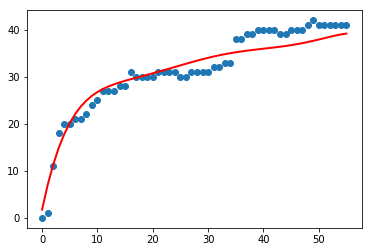

In [134]:
### ESTE ES DE PRUEBA ######
def entrenar_modelo(grado, x, x_test, y, y_test):
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree = grado)
            
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
            
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
            
    #Entreno el modelo
    pr.fit(x_train_poli, y)
            
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
            
    R2 = pr.score(x_test_poli, y_test)
    #mse = mean_squared_error(y_true = y_test, y_pred = y_pred_pr)
    return y_pred_pr, R2

from statistics import *
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/"
filepath4 = "../datasets-tfg/conferencias v1/resultado/graficas modelos/"
mainpath = "../datasets-tfg/conferencias v1/resultado"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")
mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")
#result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'Mse','Rmse','R2'))
result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'ErrorRel'))

j=0
k=2
#prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_C" + str(k) + ".csv")
prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_tail.csv")
       
ndias=len(prueba)
        
#Estos datos los usaremos para comprobar el modelo elegido
x_test1= np.arange(0,ndias,1)
x_test1 = x_test1[:, np.newaxis]
y_test1 = prueba["Enviados"]
            
mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")
n=len(mapa)
                      
x=0
y=0
i=0
R2_aux=0
while i<n:
    if k!=mapa_conf["Numero escalones"][j]:
        if mapa["Escalon"][i]==k:
            filename = mapa["NombreCurva"][i] + '.csv'
            file = os.path.join(filepath, filename)
                    
            temp_data = pd.read_csv(file)
            temp_data = temp_data.dropna()
            temp_data = temp_data.reset_index(drop=True)
                    
            
            #   if ["Escalon"][i]==k:
            #       if i==0:
            #           y = temp_data["Enviados"]
            #           x = temp_data["Dia"]
            #       else: 
            #           y = np.append(y,temp_data["Enviados"])
            #           x = np.append(x,temp_data["Dia"])
            
            if i==0:
                y = temp_data["Enviados"]
                x = temp_data["Dia"]
            else: 
                y = np.append(y,temp_data["Enviados"])
                x = np.append(x,temp_data["Dia"])
                        
    else:
                
        if mapa["Escalon"][i]==-1:
            filename = mapa["NombreCurva"][i] + '.csv'
            file = os.path.join(filepath, filename)
                    
            temp_data = pd.read_csv(file)
            temp_data = temp_data.dropna()
            temp_data = temp_data.replace([np.inf, -np.inf], np.nan).dropna()
            temp_data = temp_data.reset_index(drop=True)
                    
            
            #   if ["Escalon"][i]==k:
            #       if i==0:
            #           y = temp_data["Enviados"]
            #           x = temp_data["Dia"]
            #       else: 
            #           y = np.append(y,temp_data["Enviados"])
            #           x = np.append(x,temp_data["Dia"])
            
            if i==0:
                y = temp_data["Enviados"]
                x = temp_data["Dia"]
            else: 
                y = np.append(y,temp_data["Enviados"])
                x = np.append(x,temp_data["Dia"])
            
    i=i+1
        
x=x/100*ndias
x = x[:, np.newaxis]
grado=6
        
for l in range (1, 5):
            
#Estos datos los usaremos para elegir el modelo que mejor se ajuste
    x_test = np.arange(0,round(l*ndias/5),1)
    drop = np.arange(round(l*ndias/5),ndias,1)
    #x_test= np.arange((l-1)*ndias/5,round(l*ndias/5),1)
    #drop= np.arange(round(l*ndias/5),ndias,1)
    prueba1 = prueba.drop(drop)
    if np.all(x_test==0):
        x_test = np.arange(0, 1, 1)
        drop= np.arange(1,ndias,1)
        prueba1 = prueba.drop(drop)
    x_test = x_test[:, np.newaxis]
    y_test = prueba1["Enviados"]
            
    matrizR2 = np.zeros(shape=(n,6))
    R2=[]
        
    h=0
    while h<1200:
        y1=y/100*h
        m=len(y)
                
        y_pred_pr, R2_aux = entrenar_modelo(grado, x, x_test, y1, y_test)
        R2.append(R2_aux)
        
        %matplotlib inline
        plt.scatter(x_test1, y_test1)
        plt.plot(x_test, y_pred_pr, color='red', linewidth=2)
        plt.savefig(filepath4 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(h)  )
        h=h+1
        
    R2p=0
    escala=0
    for a in range (0, len(R2)):
        if R2[a]>R2p:
            R2p=R2[a]
            escala=a+40
        
    if escala==0:
        R2p=abs(R2[0])
        escala=40
        for a in range (0, len(R2)):
            if abs(R2[a])<R2p:
                R2p=abs(R2[a])
                escala=a+40
                
        #x_test=np.arange(0,ndias,1)
        #x_test = x_test[:, np.newaxis]
        
    y1=y/100*escala
        
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree =grado)
        
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test1)
        
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
        
    #Entreno el modelo
    pr.fit(x_train_poli, y1)
        
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
        
    #c0 = pr.intercept_
    #c1 = pr.coef_[1]
        
            #if grado>1:
                #c2 = pr.coef_[2]
                #if grado>2:
                    #c3 = pr.coef_[3]
                    #if grado>3:
                        #c4 = pr.coef_[4]
                        #if grado>4:
                            #c5 = pr.coef_[5]
                            #if grado>5:
                                #c6 = pr.coef_[6]
                                
            # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
            #mse.append(mean_squared_error(y_true = y_test1, y_pred = y_pred_pr))         

            # La raíz cuadrada del MSE es el RMSE
            #rmse.append(np.sqrt(mse[l-1]))
                      
    #coefR2.append(pr.score(x_test_poli, y_test1))   
    if k!=mapa_conf["Numero escalones"][j]:
        mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_C" + str(k)]
    else:
        mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_tail"]
            
    mapa_curv1 = mapa_curv1.reset_index(drop=True)
           
    %matplotlib inline
    plt.scatter(x_test1, y_test1)
    plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
            
    if k!=mapa_conf["Numero escalones"][j]:
        plt.savefig(filepath4 + "AAAConf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(escala)  )
    else:
        plt.savefig(filepath4 + "AAAConf " + str(j) + " Tail " + str(l) + "%5" + " Escala " + str(escala)  )
           


In [ ]:
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/entrenamiento/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/graficas modelos/"

ndias=50
#Declaramos un dataframe vacio
mapa2 = pd.DataFrame(columns=('Escalon','Grado','c0','c1','c2','c3','c4','c5','c6'))

mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")

#Añado nuevas columnas, donde vamos a almacenar el grado y los coef de la regresión polinomial que mejor se ajusta


n = len(mapa["NombreCurva"])

matrizR2 = np.zeros(shape=(n,6))
R2media = []


for k in range (1,7):
    i=0
    x=0
    y=0
    while i<n:
        filename = mapa["NombreCurva"][i] + '.csv'
        file = os.path.join(filepath, filename)
    
        temp_data = pd.read_csv(file)
        if mapa["Escalon"][i]==k:
            if i==0:
                y = temp_data["Enviados"]
                x = temp_data["Dia"]
            else: 
                y = np.append(y,temp_data["Enviados"])
                x = np.append(x,temp_data["Dia"])
        
        i=i+1
    x=x/100*50
    m=len(y)
    x = x[:, np.newaxis] #Ponemos [:, np.newaxis] porque la función necesita que le pasen un dataframe y X es solo una columna
    
    # Separamos los datos de entrenamiento y prueba
    x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    coef0=[0, 0, 0, 0, 0, 0]
    coef1=[0, 0, 0, 0, 0, 0]
    coef2=[0, 0, 0, 0, 0, 0]
    coef3=[0, 0, 0, 0, 0, 0]
    coef4=[0, 0, 0, 0, 0, 0]
    coef5=[0, 0, 0, 0, 0, 0]
    coef6=[0, 0, 0, 0, 0, 0]
    R2=np.zeros(6)
    
    grado=1
    while grado<7:
        
        #Se define el grado del polinomio
        poli_reg = PolynomialFeatures(degree =grado)
        
        #Se transforma las características existentes en características de mayor grado
        x_train_poli = poli_reg.fit_transform(x_train)
        x_test_poli = poli_reg.fit_transform(x_test)
        
        #Defino el algoritmo a utilizar
        pr = LinearRegression()
        
        #Entreno el modelo
        pr.fit(x_train_poli, y_train)

        #Realizo una predicción
        y_pred_pr = pr.predict(x_test_poli)
        coef0[grado-1] = pr.intercept_
        coef1[grado-1] = pr.coef_[1]
        
        if grado>1:
            coef2[grado-1] = pr.coef_[2]
            if grado>2:
                coef3[grado-1] = pr.coef_[3]
                if grado>3:
                    coef4[grado-1] = pr.coef_[4]
                    if grado>4:
                        coef5[grado-1] = pr.coef_[5]
                        if grado>5:
                            coef6[grado-1] = pr.coef_[6]
    
        R2[grado-1]=pr.score(x_test_poli, y_test)
        
        if R2[grado-1]>=0:
            grado=grado+1
    
#if np.all(R2>=0):
    #matrizR2[i] = R2
    R2p=0
    grado=0
    for a in range (0, 6):
        if R2[a]>R2p:
            R2p=R2[a]
            grado=a+1
            
    x_test=np.arange(0,ndias,1)
    x_test = x_test[:, np.newaxis]
    
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree =grado)
        
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
        
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
        
    #Entreno el modelo
    pr.fit(x_train_poli, y)
        
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
        
    c0 = pr.intercept_
    c1 = pr.coef_[1]
        
    if grado>1:
        c2 = pr.coef_[2]
        if grado>2:
            c3 = pr.coef_[3]
            if grado>3:
                c4 = pr.coef_[4]
                if grado>4:
                    c5 = pr.coef_[5]
                    if grado>5:
                        c6 = pr.coef_[6]
                            

    
    mapa2.loc[len(mapa2)]=[k,grado,c0,c1,c2,c3,c4,c5,c6] 
    
    a= np.arange(0,100,1)
    %matplotlib inline
    graf = coef0[grado-1] + coef1[grado-1]*a + coef2[grado-1]*(a**2) + coef3[grado-1]*(a**3) + coef4[grado-1]*(a**4) + coef5[grado-1]*(a**5) + coef6[grado-1]*(a**6)
    plt.scatter(x, y)
    plt.plot(x_test, y_pred_pr, color='red', linewidth=2)
    #plt.title(mapa["NombreCurva"][i]) 
    plt.savefig(filepath3 + 'Grafica Escalon' + str(k) + 'grado' + str(grado))


mapa2.to_csv(filepath2 + 'MapaModeloEscalones.csv', index=False)
        


In [14]:
###### no valeeeee #####
from statistics import *
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/"
mainpath = "../datasets-tfg/conferencias v1/resultado"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")
mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")
#result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'Mse','Rmse','R2'))
result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs'))

d = len(mapa_conf)
for j in range (0, d):
    
    #Creamos una carpeta donde vamos a almacenar las gráficas de cada test
    #fullpath = os.path.join(mainpath, "Prueba Conf " + str(j))
    #fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/Prueba Conf ' + str(j))
    #if fileExists == True:
    #    rmtree(fullpath)
    #os.makedirs(fullpath)

    
    for k in range (1, mapa_conf["Numero escalones"][j] + 1):
        
        #Creamos una carpeta donde vamos a almacenar las gráficas de cada escalon
        #fullpath = os.path.join(mainpath, "Prueba Conf " + str(j) + "/Escalon " + str(k))
        #fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/Prueba Conf ' + str(j) + "/Escalon " + str(k))
        #if fileExists == True:
        #    rmtree(fullpath)
        #os.makedirs(fullpath)
        
        if k!=mapa_conf["Numero escalones"][j]:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_C" + str(k) + ".csv")
        else:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_tail.csv")
       
        ndias=len(prueba)
        
        #Estos datos los usaremos para comprobar el modelo elegido
        x_test1= np.arange(0,ndias,1)
        x_test1 = x_test1[:, np.newaxis]
        y_test1 = prueba["Enviados"]
            
        mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")
        n=len(mapa)
                      
        #mse=[]
        #rmse=[]
        #coefR2=[]  
        i=0
        x=0
        y=0
        R2_aux=0
        mse_aux=0
        while i<n:
            
            if k!=mapa_conf["Numero escalones"][j]:
                if mapa["Escalon"][i]==k:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.reset_index(drop=True)
            
                    if i==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
                        
            else:
                
                if mapa["Escalon"][i]==-1:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.replace([np.inf, -np.inf], np.nan).dropna()
                    temp_data = temp_data.reset_index(drop=True)
            
                    if i==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
            
            i=i+1
        
        x=x/100*ndias
        x = x[:, np.newaxis]
        grado=6
        
        for l in range (1, 5):
            
            #Estos datos los usaremos para elegir el modelo que mejor se ajuste
            x_test= np.arange(0,round(l*ndias/5),1)
            drop= np.arange(round(l*ndias/5),ndias,1)
            prueba1 = prueba.drop(drop)
            if np.all(x_test==0):
                x_test = np.arange(0, 1, 1)
                drop= np.arange(1,ndias,1)
                prueba1 = prueba.drop(drop)
            x_test = x_test[:, np.newaxis]
            y_test = prueba1["Enviados"]
            
            matrizR2 = np.zeros(shape=(n,6))
            R2=[]
            
            #a=1
            #b=1200
            #R2_a=0
            #R2_b=0
            #mse_a=0
            #mse_b=0
            #while abs(a-b)!=1:
                
            #    c= round((b-a)/2+a)
                
            #    ya=y/100*a
            #    y_pred_pr, R2_a, mse_a = entrenar_modelo(6, x, x_test, ya, y_test)
                
            #    yb=y/100*b
            #    y_pred_pr, R2_b, mse_a = entrenar_modelo(6, x, x_test, yb, y_test)
                
            #    if mse_a < mse_b:
            #        b=c
            #    else:
            #        a=c
                        
            #if mse_a < mse_b:
            #    escala=a
            #else:
            #    escala=b
            
                      
            y1=y/100*escala
        
            y_pred_pr, R2_aux, mse_aux = entrenar_modelo(grado, x, x_test1, y1, y_test1)
        
            #c0 = pr.intercept_
            #c1 = pr.coef_[1]
        
            #if grado>1:
                #c2 = pr.coef_[2]
                #if grado>2:
                    #c3 = pr.coef_[3]
                    #if grado>3:
                        #c4 = pr.coef_[4]
                        #if grado>4:
                            #c5 = pr.coef_[5]
                            #if grado>5:
                                #c6 = pr.coef_[6]
                                
            # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
            #mse.append(mean_squared_error(y_true = y_test1, y_pred = y_pred_pr))         

            # La raíz cuadrada del MSE es el RMSE
            #rmse.append(np.sqrt(mse[l-1]))
                      
            #coefR2.append(pr.score(x_test_poli, y_test1))   
            if k!=mapa_conf["Numero escalones"][j]:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_C" + str(k)]
            else:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_tail"]
            
            mapa_curv1 = mapa_curv1.reset_index(drop=True)
            #result.loc[len(result)]=[str(j), str(k), str(l), escala, mapa_curv1["EnviadosTotales"][0], escala-mapa_curv1["EnviadosTotales"][0], mse[l-1], rmse[l-1], coefR2[l-1]]   
            result.loc[len(result)]=[str(j), str(k), str(l), escala, mapa_curv1["EnviadosTotales"][0], escala-mapa_curv1["EnviadosTotales"][0]]
            
            %matplotlib inline
            plt.scatter(x_test1, y_test1)
            plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
            
            if k!=mapa_conf["Numero escalones"][j]:
                plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(escala)  )
            else:
                plt.savefig(filepath3 + "Conf " + str(j) + " Tail " + str(l) + "%5" + " Escala " + str(escala)  )
           
        

result

ValueError: not enough values to unpack (expected 3, got 2)

In [215]:
result2 = pd.DataFrame(columns=('Conferencia','Tramo','Error Relativo Medio', "EnviadosCalculados", "EnviadosReales"))
for i in range (0,d):
    errorr_medio = []
    enviados_pred = []
    enviados_reales = []
    for j in range (1,5):
        result1 = result[result.Conferencia == str(i)]
        result1 = result1[result1.LongTramo == (str(j) + "/5")]
        enviados_pred.append(sum(result1["EnviadosCalculados"]))
        enviados_reales.append(sum(result1["EnviadosReales"]))
        result1 = result1[result1.Escalon != str(-1)]
        errorr_medio.append(result1["ErrorRel"].mean())
        result2.loc[len(result2)]=[str(i), str(j) + "/5", errorr_medio[j-1], enviados_pred[j-1], enviados_reales[j-1]]  
result2

,Conferencia,Tramo,Error Relativo Medio,EnviadosCalculados,EnviadosReales
0,0,1/5,0.346525,102.0,141.0
1,0,2/5,0.458966,92.0,141.0
2,0,3/5,0.440129,89.0,141.0
3,0,4/5,0.438522,86.0,141.0
4,1,1/5,0.527397,81.0,180.0
5,1,2/5,0.308219,205.0,180.0
6,1,3/5,0.089041,175.0,180.0
7,1,4/5,0.082192,152.0,180.0
8,2,1/5,0.199907,368.0,464.0
9,2,2/5,0.401272,349.0,464.0


In [216]:
mainpath = "../datasets-tfg/conferencias v1/resultado"
mainpath1 = "../datasets-tfg/conferencias v1/resultado/graficas error relativo"
#Creamos la carpeta graficas error relativo
fullpath = os.path.join(mainpath, "graficas error relativo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas error relativo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas error relativo
fullpath = os.path.join(mainpath1, "error de cada conferencia")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas error relativo/error de cada conferencia')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas error relativo
fullpath = os.path.join(mainpath1, "errores de cada conferencia agrupados por escalon y tramo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas error relativo/errores de cada conferencia agrupados por escalon y tramo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

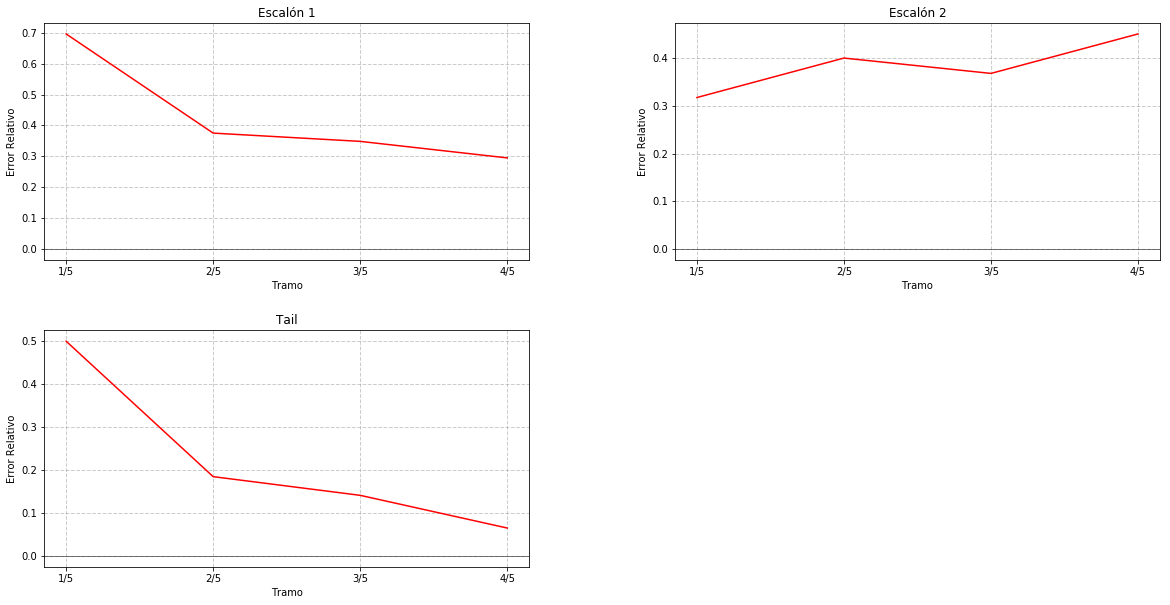

In [217]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/error de cada conferencia/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

for j in range (0, len(mapa_conf)):
    
    result1 = result[result.Conferencia == str(j)]
    %matplotlib inline
    fig1 = plt.figure("Filtro")
    fig1.set_size_inches(20, 10)
    fig1.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for k in range (1, mapa_conf["Numero escalones"][j]+1):
        if k != mapa_conf["Numero escalones"][j]:
            result3 = result1[result1.Escalon == str(k)]
        else:
            result3 = result1[result1.Escalon == str(-1)]
            
        x = result3["LongTramo"]
        y = result3["ErrorRel"]
        if mapa_conf["Numero escalones"][j]<=4:
            ax = fig1.add_subplot(2, 2, k)
        else:
            ax = fig1.add_subplot(2, 3, k)
        ax.plot(x,y,"r")
        ax.set_xlabel("Tramo")
        ax.set_ylabel("Error Relativo")
        if k != mapa_conf["Numero escalones"][j]:
            ax.set_title("Escalón " + str(k))
        else: 
            ax.set_title("Tail")
        ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
        # Pintar los ejes pasando por (0,0)
        ax.axhline(0, color='black', linewidth=0.5)
        
    
    plt.savefig(filepath + "Conf " + str(j))


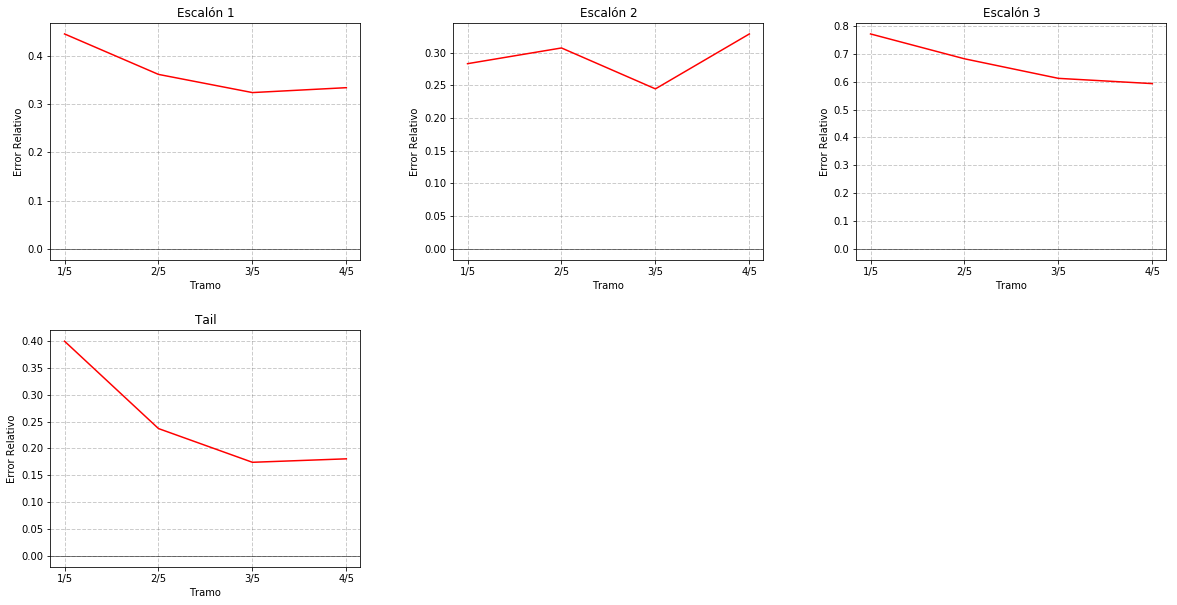

In [218]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

    
%matplotlib inline
fig1 = plt.figure("Filtro")
fig1.set_size_inches(20, 10)
fig1.subplots_adjust(hspace=0.3, wspace=0.3)
    
for k in range (1, max(mapa_conf["Numero escalones"])):
    result5 = result[result.Escalon == str(k)]
    x = ["1/5", "2/5", "3/5", "4/5"]
    y = []
    for i in range (1, 5):
        result6 = result5[result5.LongTramo == (str(i) + "/5")]
        y.append(result6["ErrorRel"].mean())
 
    ax = fig1.add_subplot(2, 3, k)
    ax.plot(x,y,"r")
    ax.set_xlabel("Tramo")
    ax.set_ylabel("Error Relativo")
    ax.set_title("Escalón " + str(k))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    # Pintar los ejes pasando por (0,0)
    ax.axhline(0, color='black', linewidth=0.5)
        
result5 = result[result.Escalon == str(-1)]
x = ["1/5", "2/5", "3/5", "4/5"]
y = []
for i in range (1, 5):
    result6 = result5[result5.LongTramo == (str(i) + "/5")]
    y.append(result6["ErrorRel"].mean())

ax = fig1.add_subplot(2, 3, k+1)
ax.plot(x,y,"r")
ax.set_xlabel("Tramo")
ax.set_ylabel("Error Relativo")
ax.set_title("Tail")
ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
# Pintar los ejes pasando por (0,0)
ax.axhline(0, color='black', linewidth=0.5)

plt.savefig(filepath + "Error Relativo Medio de cada escalon")

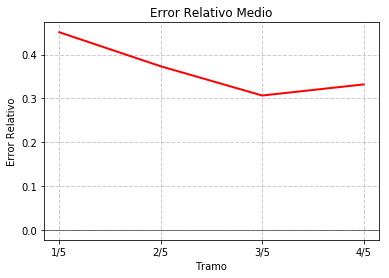

In [219]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

    
x = ["1/5", "2/5", "3/5", "4/5"]
y = []
for i in range (1, 5):
    result4 = result2[result2.Tramo == (str(i) + "/5")]
    y.append(result4["Error Relativo Medio"].mean())

%matplotlib inline
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel("Tramo")
plt.ylabel("Error Relativo")
plt.title("Error Relativo Medio")
plt.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
# Pintar los ejes pasando por (0,0)
plt.axhline(0, color='black', linewidth=0.5)
        
    
plt.savefig(filepath + "Error Relativo Medio")


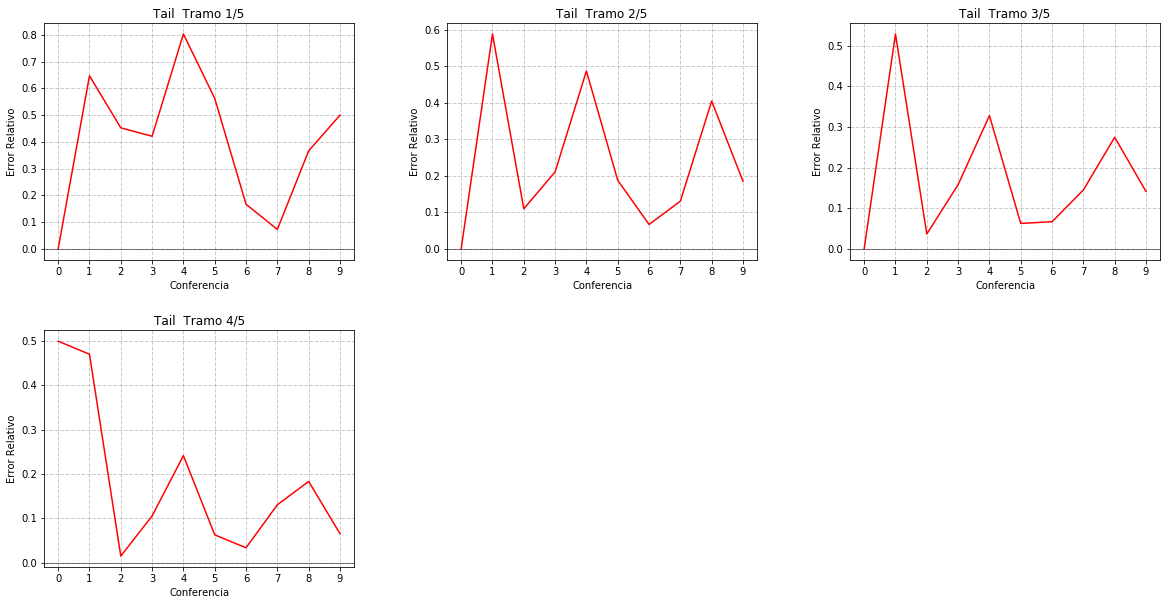

In [220]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/errores de cada conferencia agrupados por escalon y tramo/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

for k in range (1, max(mapa_conf["Numero escalones"])):
    result1 = result[result.Escalon == str(k)]
    %matplotlib inline
    fig1 = plt.figure("Filtro")
    fig1.set_size_inches(20, 10)
    fig1.subplots_adjust(hspace=0.3, wspace=0.3)
     

    for i in range (1, 5):
        result3 = result1[result1.LongTramo == (str(i) + "/5")]
        
        x = result3["Conferencia"]
        y = result3["ErrorRel"]
        ax = fig1.add_subplot(2, 3, i)
        ax.plot(x,y,"r")
        ax.set_xlabel("Conferencia")
        ax.set_ylabel("Error Relativo")
        ax.set_title("Escalón " + str(k) + " Tramo " + str(i) + "/5")
        ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
        # Pintar los ejes pasando por (0,0)
        ax.axhline(0, color='black', linewidth=0.5)
        
        
    plt.savefig(filepath + "Escalon " + str(k))
    
#Ahora la tail
result1 = result[result.Escalon == str(-1)]
%matplotlib inline
fig1 = plt.figure("Filtro")
fig1.set_size_inches(20, 10)
fig1.subplots_adjust(hspace=0.3, wspace=0.3)
 

for i in range (1, 5):
    result3 = result1[result1.LongTramo == (str(i) + "/5")]
        
    x = result3["Conferencia"]
    y = result3["ErrorRel"]
    ax = fig1.add_subplot(2, 3, i)
    ax.plot(x,y,"r")
    ax.set_xlabel("Conferencia")
    ax.set_ylabel("Error Relativo")
    ax.set_title("Tail " + " Tramo " + str(i) + "/5")
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    # Pintar los ejes pasando por (0,0)
    ax.axhline(0, color='black', linewidth=0.5)

plt.savefig(filepath + "Tail")

In [48]:
y

7      0.222222
19     0.115385
35     0.333333
47     0.214286
55     0.214286
63     0.047619
75     0.428571
87     0.395349
95     0.125000
103    0.166667
111    0.048780
127    2.333333
135    0.090909
147    0.733333
159    0.111111
171    0.098592
187    1.000000
199    0.041667
Name: ErrorRel, dtype: float64

In [99]:
mapa_curv1["EnviadosTotales"]

Series([], Name: EnviadosTotales, dtype: int64)

In [44]:
d

18

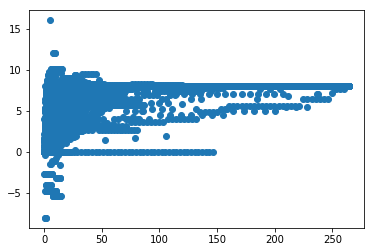

In [32]:
%matplotlib inline
plt.scatter(x, y1)

In [35]:
if any(isnan(x)):
    v=x(~isnan(x))
end

NameError: name 'isnan' is not defined

In [221]:
result["ErrorRel"].mean()

0.32918388756029276

In [196]:
result["ErrorRel"].mean()

0.44665585597103546

In [28]:
result

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,153,259,106,0.409266
1,0,1,2/5,127,259,132,0.509653
2,0,1,3/5,161,259,98,0.378378
3,0,1,4/5,229,259,30,0.115830
4,0,2,1/5,56,41,15,0.365854
5,0,2,2/5,56,41,15,0.365854
6,0,2,3/5,56,41,15,0.365854
7,0,2,4/5,56,41,15,0.365854
8,1,1,1/5,25,45,20,0.444444
9,1,1,2/5,25,45,20,0.444444


In [17]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [18]:
result

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,29,14.0,15.0,1.071429
1,0,1,2/5,34,14.0,20.0,1.428571
2,0,1,3/5,24,14.0,10.0,0.714286
3,0,1,4/5,23,14.0,9.0,0.642857
4,0,2,1/5,20,22.0,2.0,0.090909
5,0,2,2/5,19,22.0,3.0,0.136364
6,0,2,3/5,16,22.0,6.0,0.272727
7,0,2,4/5,20,22.0,2.0,0.090909
8,0,3,1/5,28,8.0,20.0,2.500000
9,0,3,2/5,28,8.0,20.0,2.500000
